In [2]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from pycaret.classification import * 
from dataprep.eda import create_report

In [3]:
train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)

In [9]:
# report = create_report(train)
# report.save('dataprep_reoprt')

  0%|                                                                                         | 0/2359 [00:00<…

Report has been saved to dataprep_reoprt.html!


1. train.csv : 학습 데이터
- id : 샘플 아이디
- Gender : 성별
- Customer Type : Disloyal 또는 Loyal 고객
- Age : 나이
- Type of Travel : Business 또는 Personal Travel
- Class : 등급
- Flight Distance : 비행 거리
- Seat comfort : 좌석 만족도
- Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
- Food and drink : 식음료 만족도
- Gate location : 게이트 위치 만족도
- Inflight wifi service : 기내 와이파이 서비스 만족도
- Inflight entertainment : 기내 엔터테인먼트 만족도
- Online support : 온라인 지원 만족도
- Ease of Online booking : 온라인 예매 편리성 만족도
- On-board service : 탑승 서비스 만족도
- Leg room service : Leg room 서비스 만족도
- Baggage handling : 수하물 처리 만족도
- Checkin service : 체크인 서비스 만족도
- Cleanliness : 청결도 만족도
- Online boarding : 온라인보딩 만족도
- Departure Delay in Minutes : 출발 지연 시간
- Arrival Delay in Minutes : 도착 지연 시간
- target : 만족 여부

In [49]:
train.columns = train.columns.str.replace(' ', '_')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer_Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type_of_Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight_Distance                    3000 non-null   int64  
 6   Seat_comfort                       3000 non-null   int64  
 7   Departure/Arrival_time_convenient  3000 non-null   int64  
 8   Food_and_drink                     3000 non-null   int64  
 9   Gate_location                      3000 non-null   int64  
 10  Inflight_wifi_service              3000 non-null   int64  
 11  Inflight_entertainment             3000 non-null   int64

In [50]:
test.columns = test.columns.str.replace(' ', '_')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2000 non-null   object 
 1   Customer_Type                      2000 non-null   object 
 2   Age                                2000 non-null   int64  
 3   Type_of_Travel                     2000 non-null   object 
 4   Class                              2000 non-null   object 
 5   Flight_Distance                    2000 non-null   int64  
 6   Seat_comfort                       2000 non-null   int64  
 7   Departure/Arrival_time_convenient  2000 non-null   int64  
 8   Food_and_drink                     2000 non-null   int64  
 9   Gate_location                      2000 non-null   int64  
 10  Inflight_wifi_service              2000 non-null   int64  
 11  Inflight_entertainment             2000 non-null   int64

* 훈련 데이터가 적고 결측치가 존재하지 않음

In [51]:
train.describe()

Age  Flight_Distance  Seat_comfort  \
count  3000.000000      3000.000000   3000.000000   
mean     39.203000      1983.079333      2.863333   
std      15.108802      1028.109117      1.394981   
min       7.000000        52.000000      0.000000   
25%      27.000000      1348.250000      2.000000   
50%      39.000000      1937.000000      3.000000   
75%      51.000000      2547.250000      4.000000   
max      80.000000      6882.000000      5.000000   

       Departure/Arrival_time_convenient  Food_and_drink  Gate_location  \
count                        3000.000000     3000.000000    3000.000000   
mean                            3.009667        2.874333       3.016667   
std                             1.519543        1.431511       1.294713   
min                             0.000000        0.000000       1.000000   
25%                             2.000000        2.000000       2.000000   
50%                             3.000000        3.000000       3.000000   
75%                             4.000000        4.000000       4.000000   
max                             5.000000        5.000000       5.000000   

       Inflight_wifi_service  Inflight_entertainment  Online_support  \
count            3000.000000             3000.000000      3000.00000   
mean                3.259667                3.352333         3.50500   
std                 1.322683                1.352826         1.31068   
min                 0.000000                0.000000         1.00000   
25%                 2.000000                2.000000         3.00000   
50%                 3.000000                4.000000         4.00000   
75%                 4.000000                4.000000         5.00000   
max                 5.000000                5.000000         5.00000   

       Ease_of_Online_booking  On-board_service  Leg_room_service  \
count             3000.000000       3000.000000       3000.000000   
mean                 3.488000          3.497000          3.485000   
std                  1.302211          1.283436          1.294218   
min                  0.000000          1.000000          0.000000   
25%                  2.000000          3.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  5.000000          5.000000          5.000000   
max                  5.000000          5.000000          5.000000   

       Baggage_handling  Checkin_service  Cleanliness  Online_boarding  \
count       3000.000000      3000.000000  3000.000000      3000.000000   
mean           3.728667         3.370000     3.728667         3.356333   
std            1.154190         1.258158     1.161678         1.294057   
min            1.000000         1.000000     1.000000         0.000000   
25%            3.000000         3.000000     3.000000         2.000000   
50%            4.000000         3.000000     4.000000         4.000000   
75%            5.000000         4.000000     5.000000         4.000000   
max            5.000000         5.000000     5.000000         5.000000   

       Departure_Delay_in_Minutes  Arrival_Delay_in_Minutes       target  
count                 3000.000000               3000.000000  3000.000000  
mean                    15.634333                 15.922000     0.556000  
std                     45.083228                 45.203411     0.496937  
min                      0.000000                  0.000000     0.000000  
25%                      0.000000                  0.000000     0.000000  
50%                      0.000000                  0.000000     1.000000  
75%                     12.000000                 13.000000     1.000000  
max                   1128.000000               1115.000000     1.000000

In [52]:
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

In [63]:
train.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Seat_comfort', 'Departure/Arrival_time_convenient',
       'Food_and_drink', 'Gate_location', 'Inflight_wifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Online_booking',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'target'],
      dtype='object')

In [64]:
cat_features = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class','Seat_comfort', 'Departure/Arrival_time_convenient',
       'Food_and_drink', 'Gate_location', 'Inflight_wifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Online_booking',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding']
num_features = ['Age', 'Flight_Distance','Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

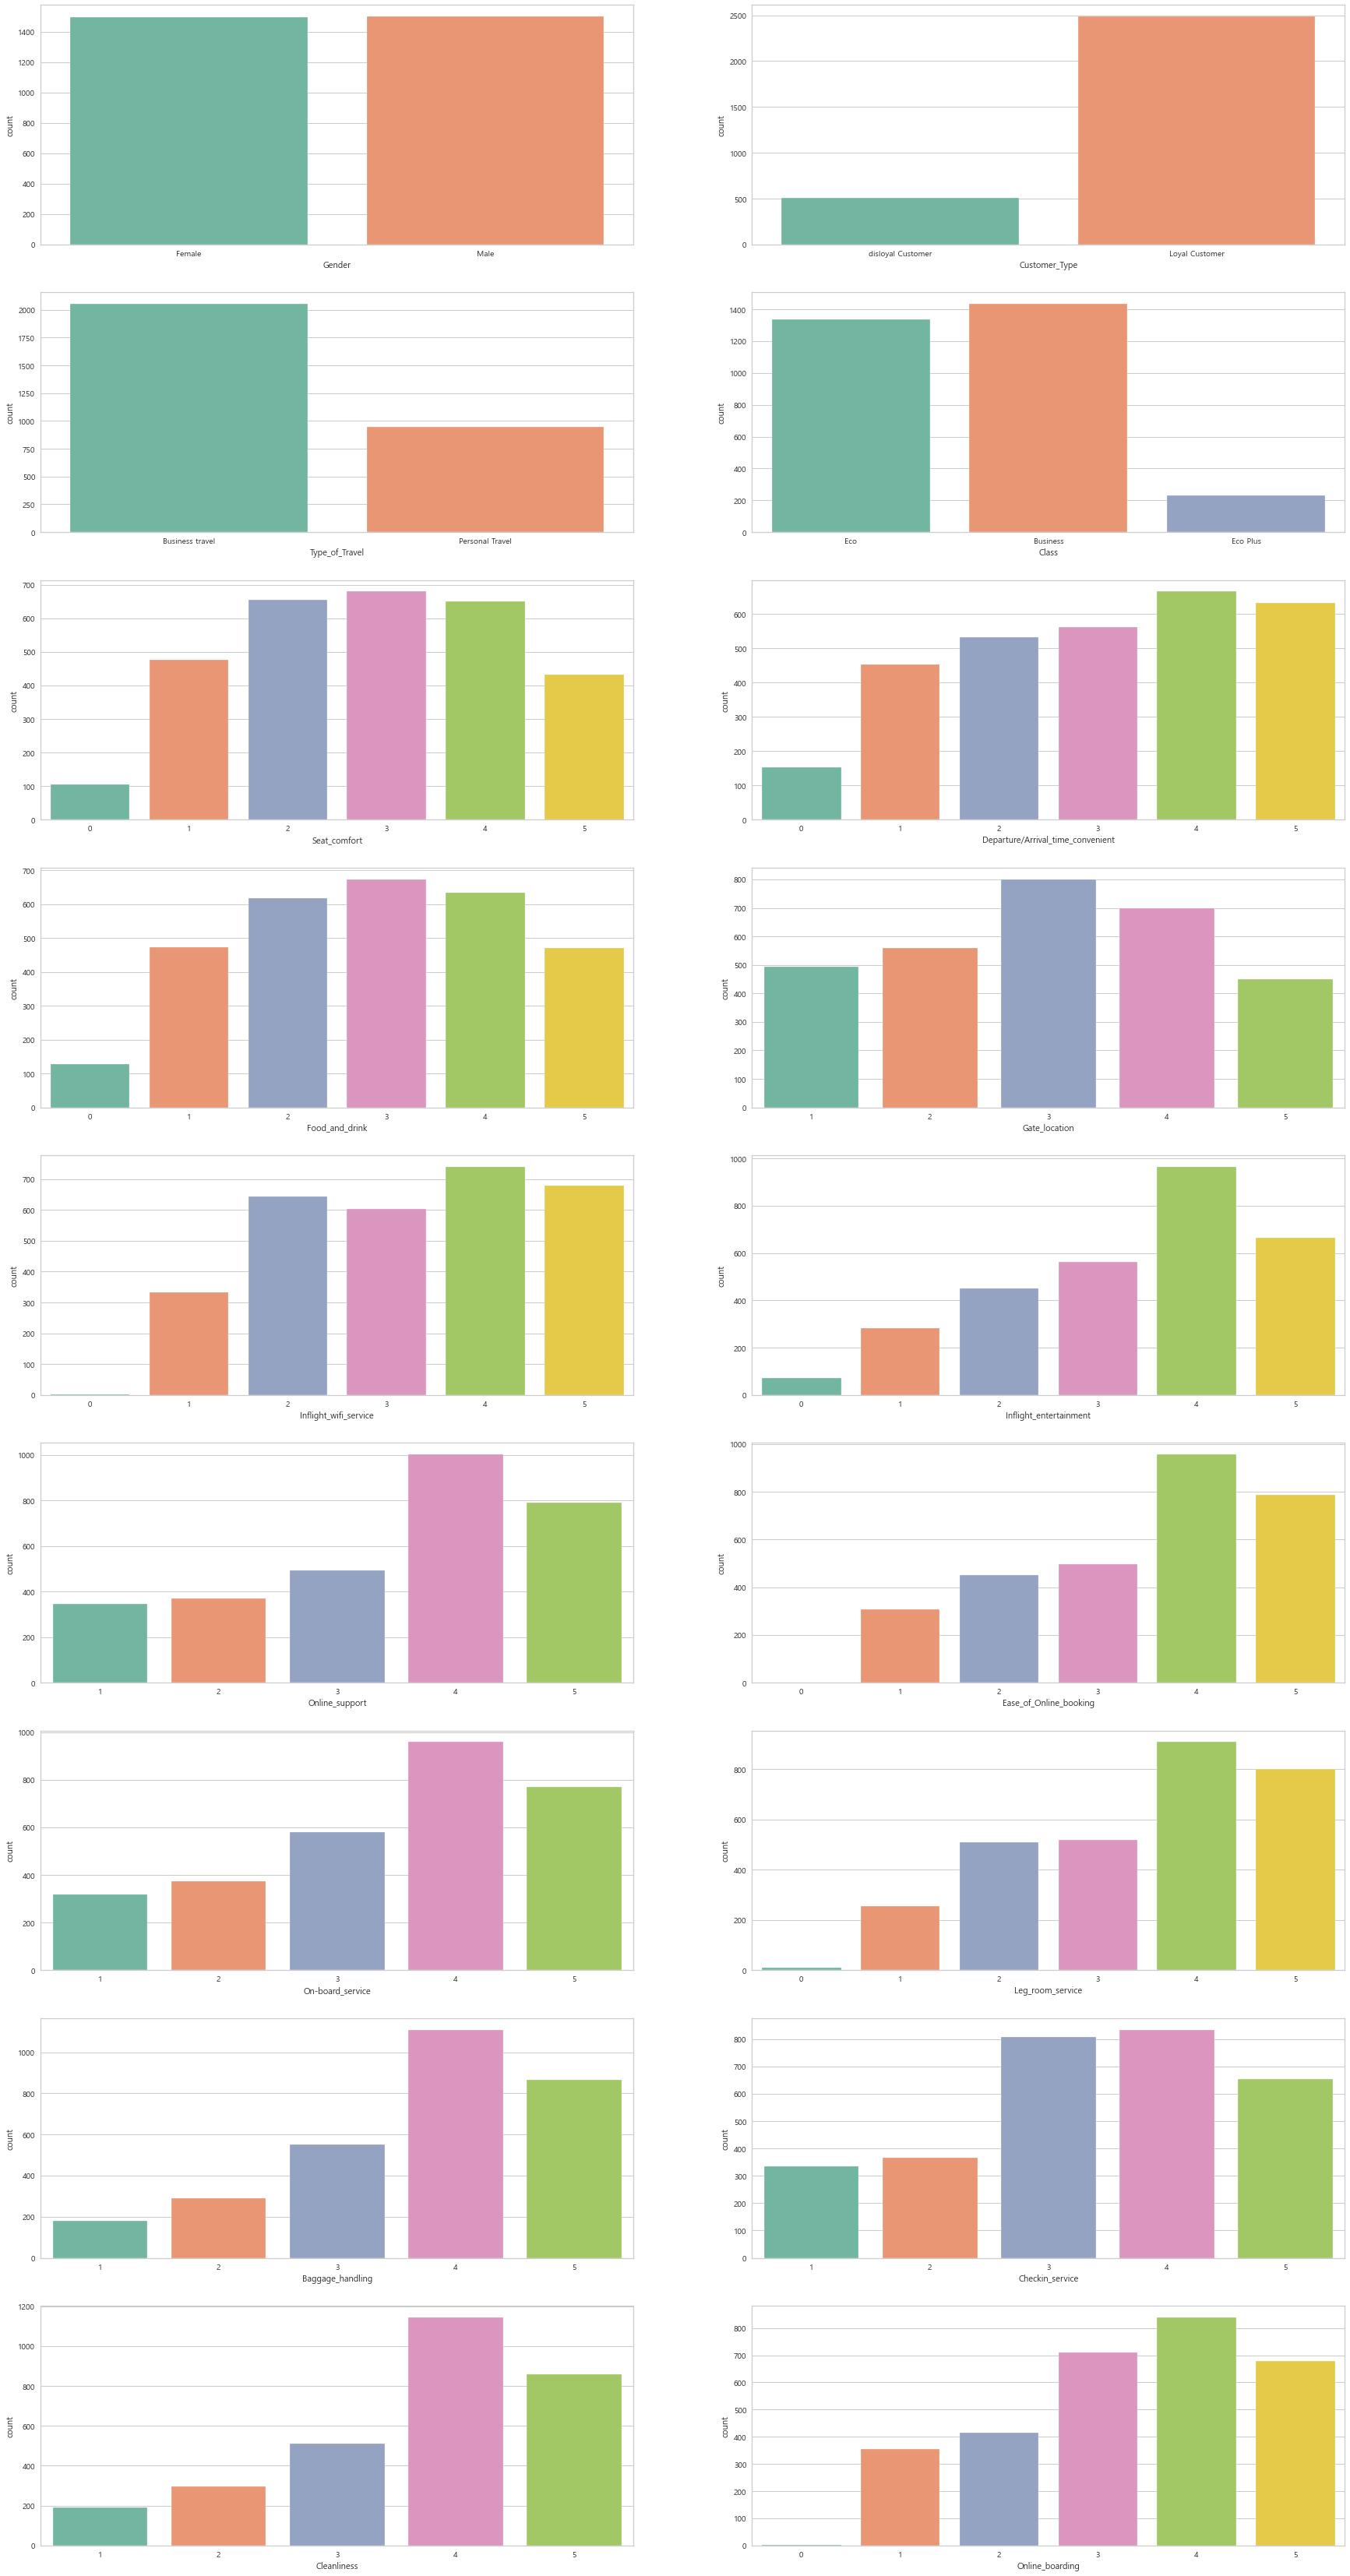

In [69]:
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(30, 60))
for i, col_name in enumerate(cat_features):
    sns.countplot(x=col_name, data=train, ax=ax[i//2][i%2], palette='Set2')
plt.show()

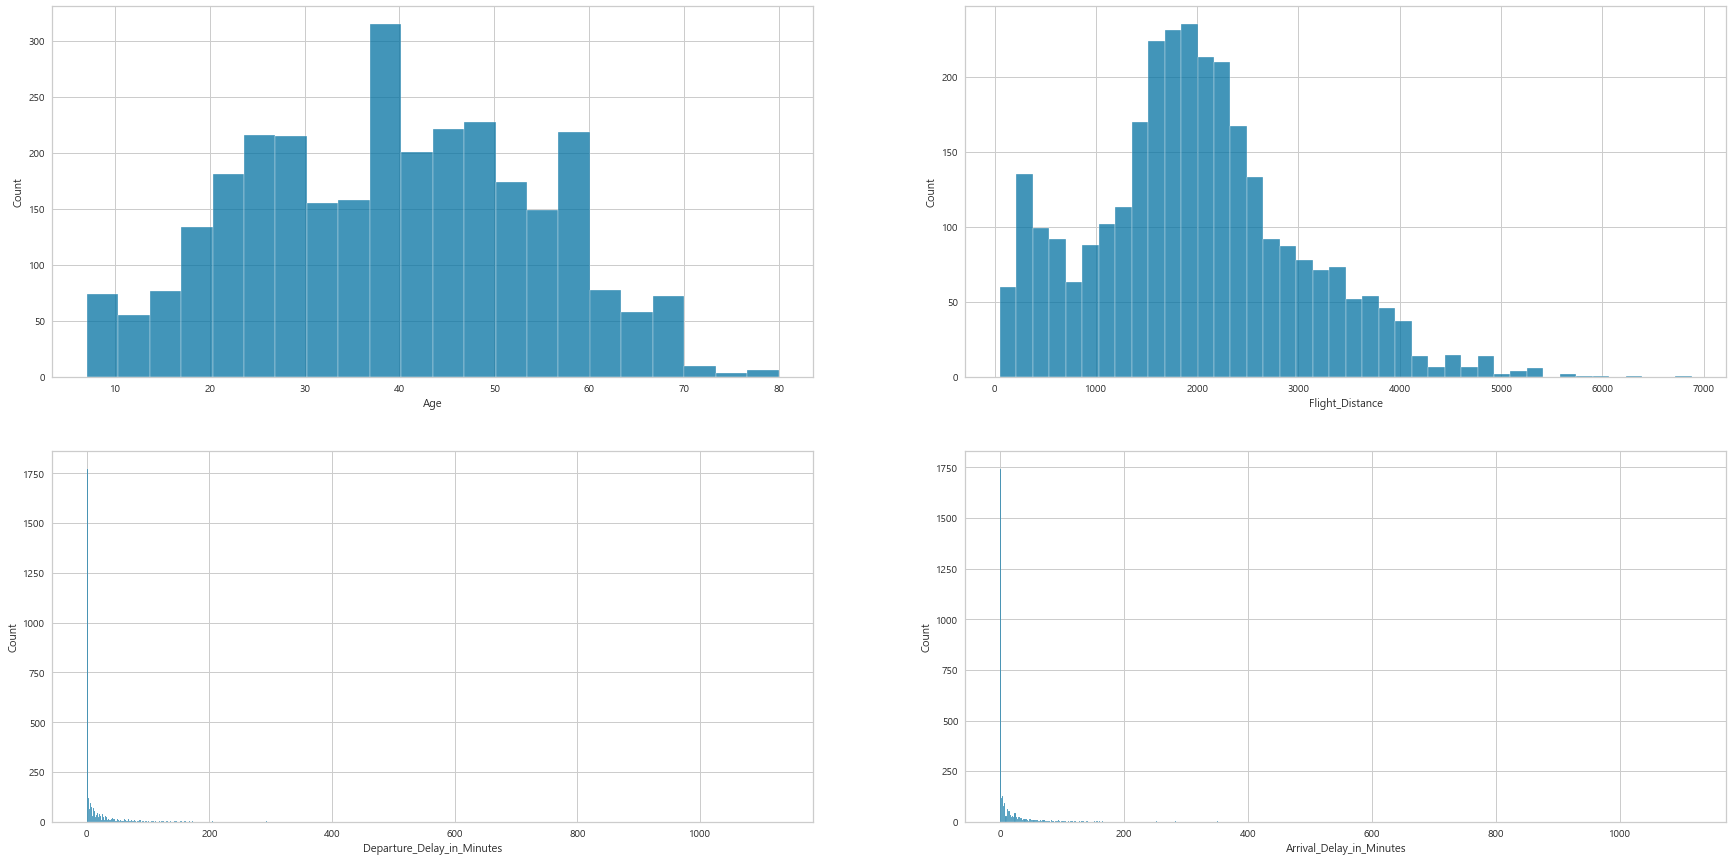

In [75]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30, 15))
for i, col_name in enumerate(num_features):
    sns.histplot(x=col_name, data=train, ax=ax[i//2][i%2], palette='Set2')
plt.show()

age를 제외한 나머지는 그래프가 왼쪽으로 치우쳐 있음.

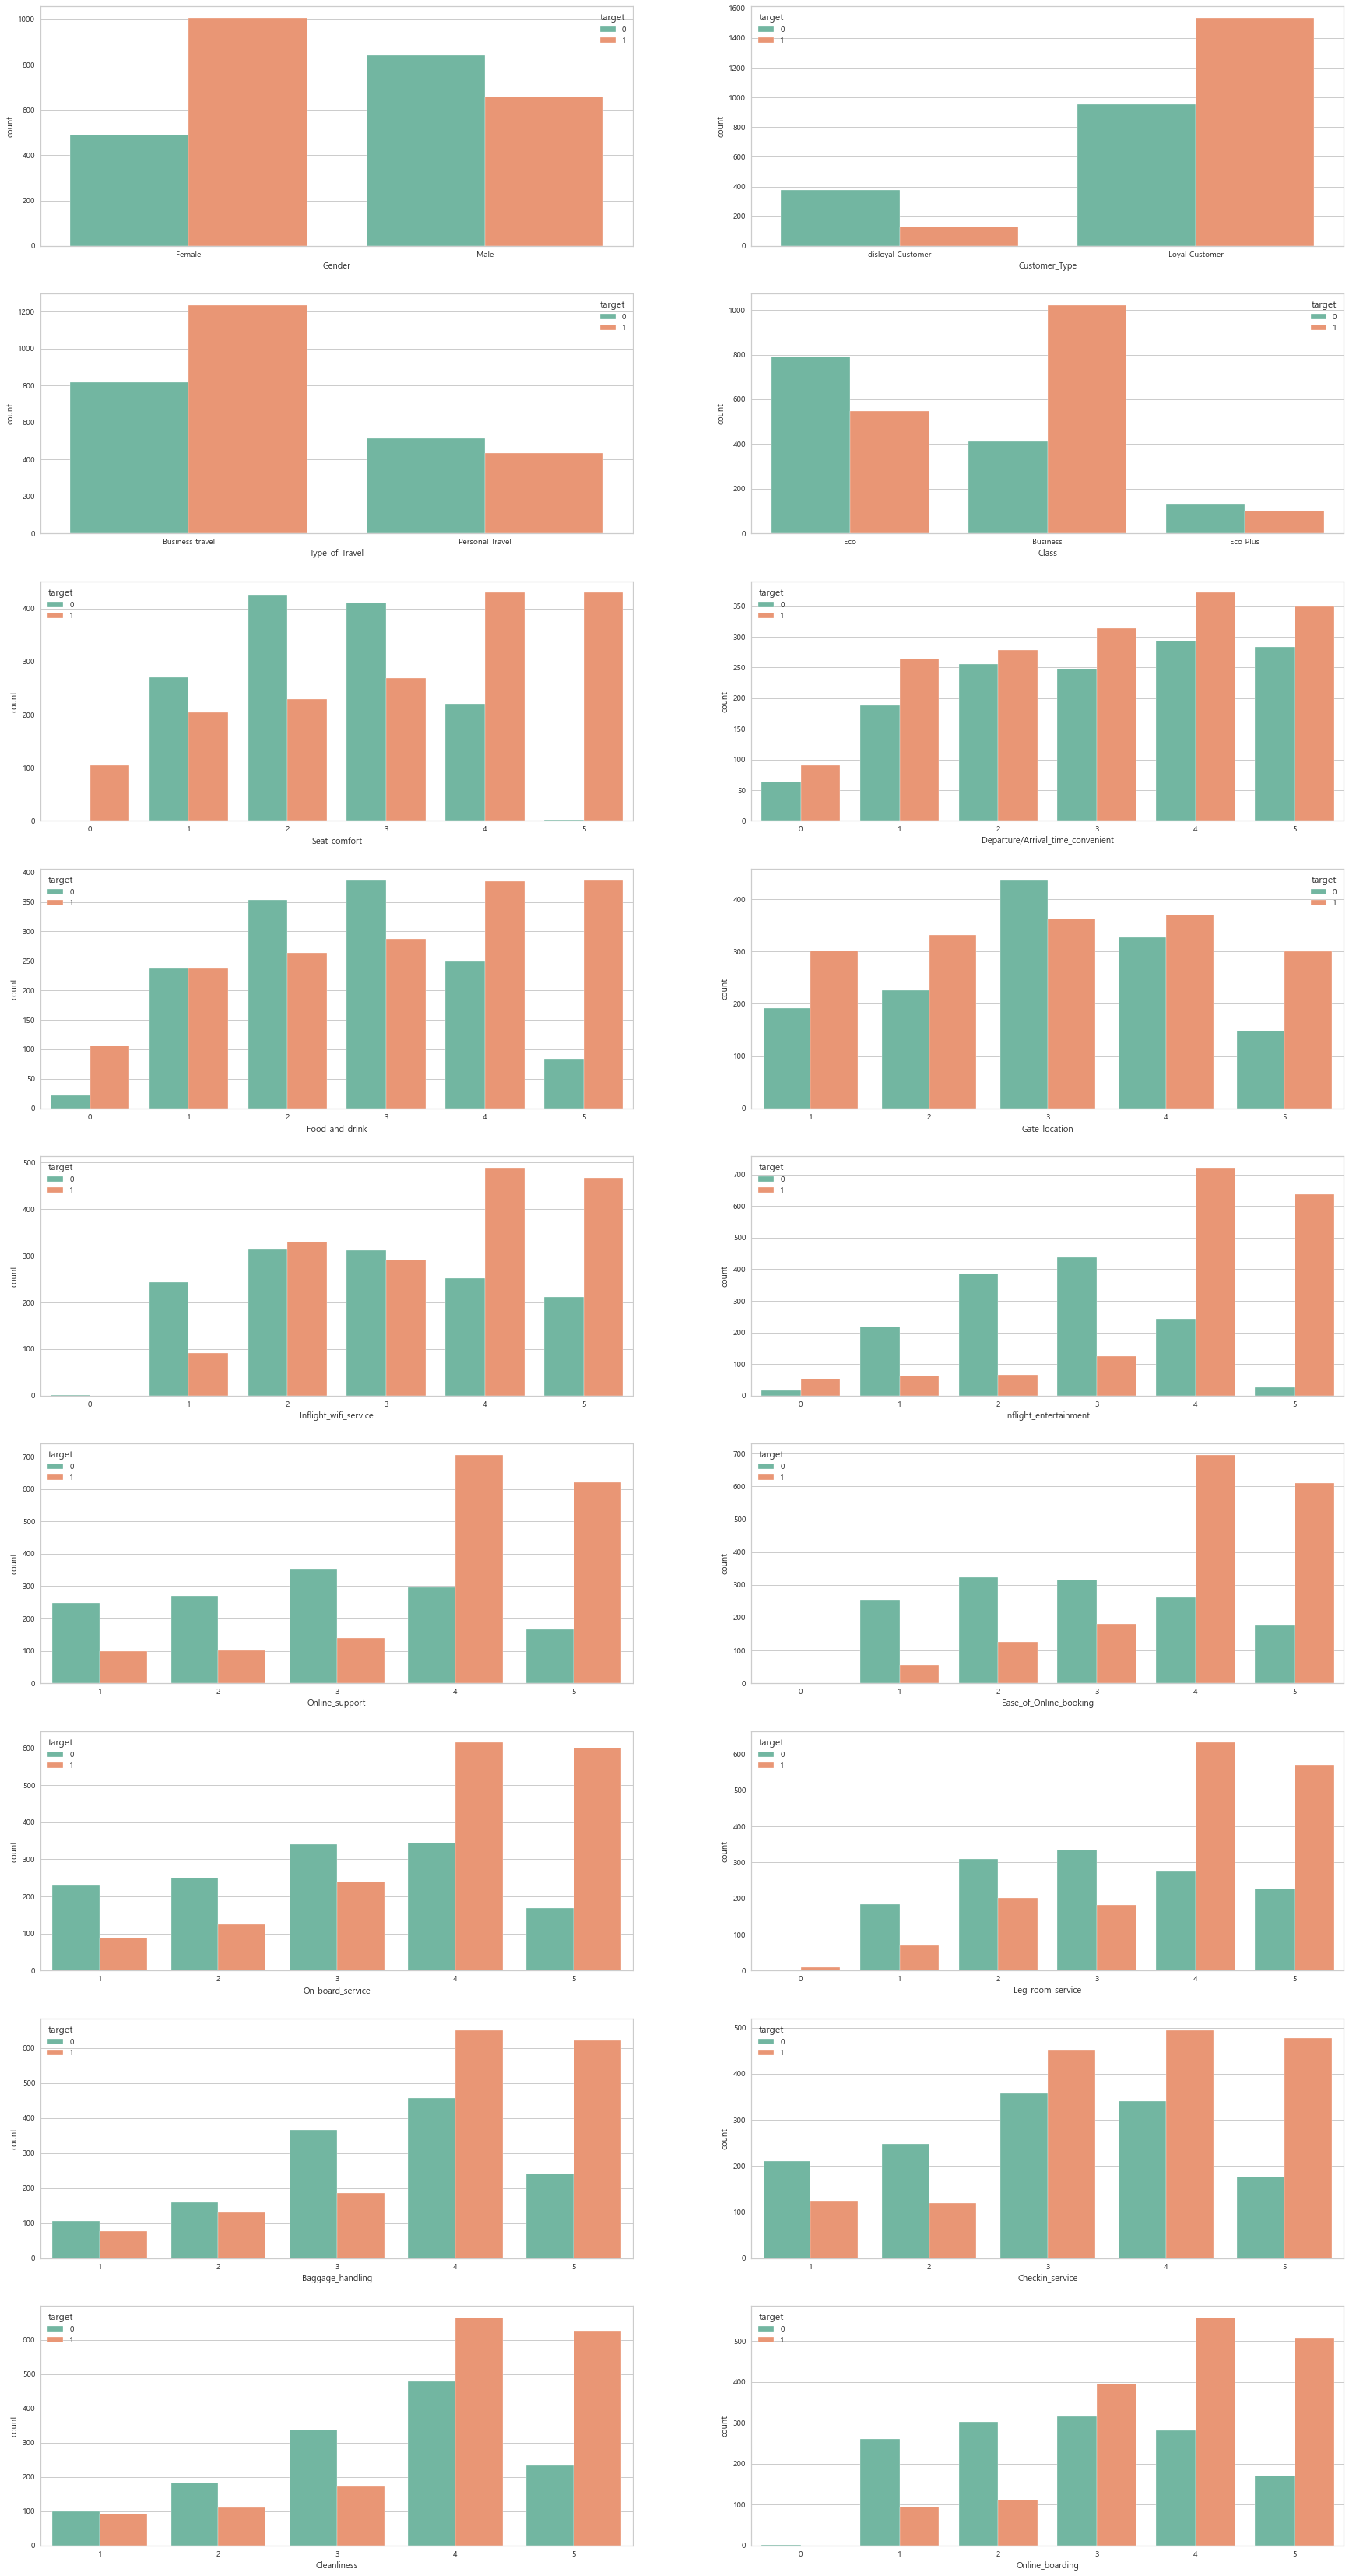

In [77]:
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(30, 60))
for i, col_name in enumerate(cat_features):
    sns.countplot(x=col_name, hue='target', data=train, ax=ax[i//2][i%2], palette='Set2')
plt.show()

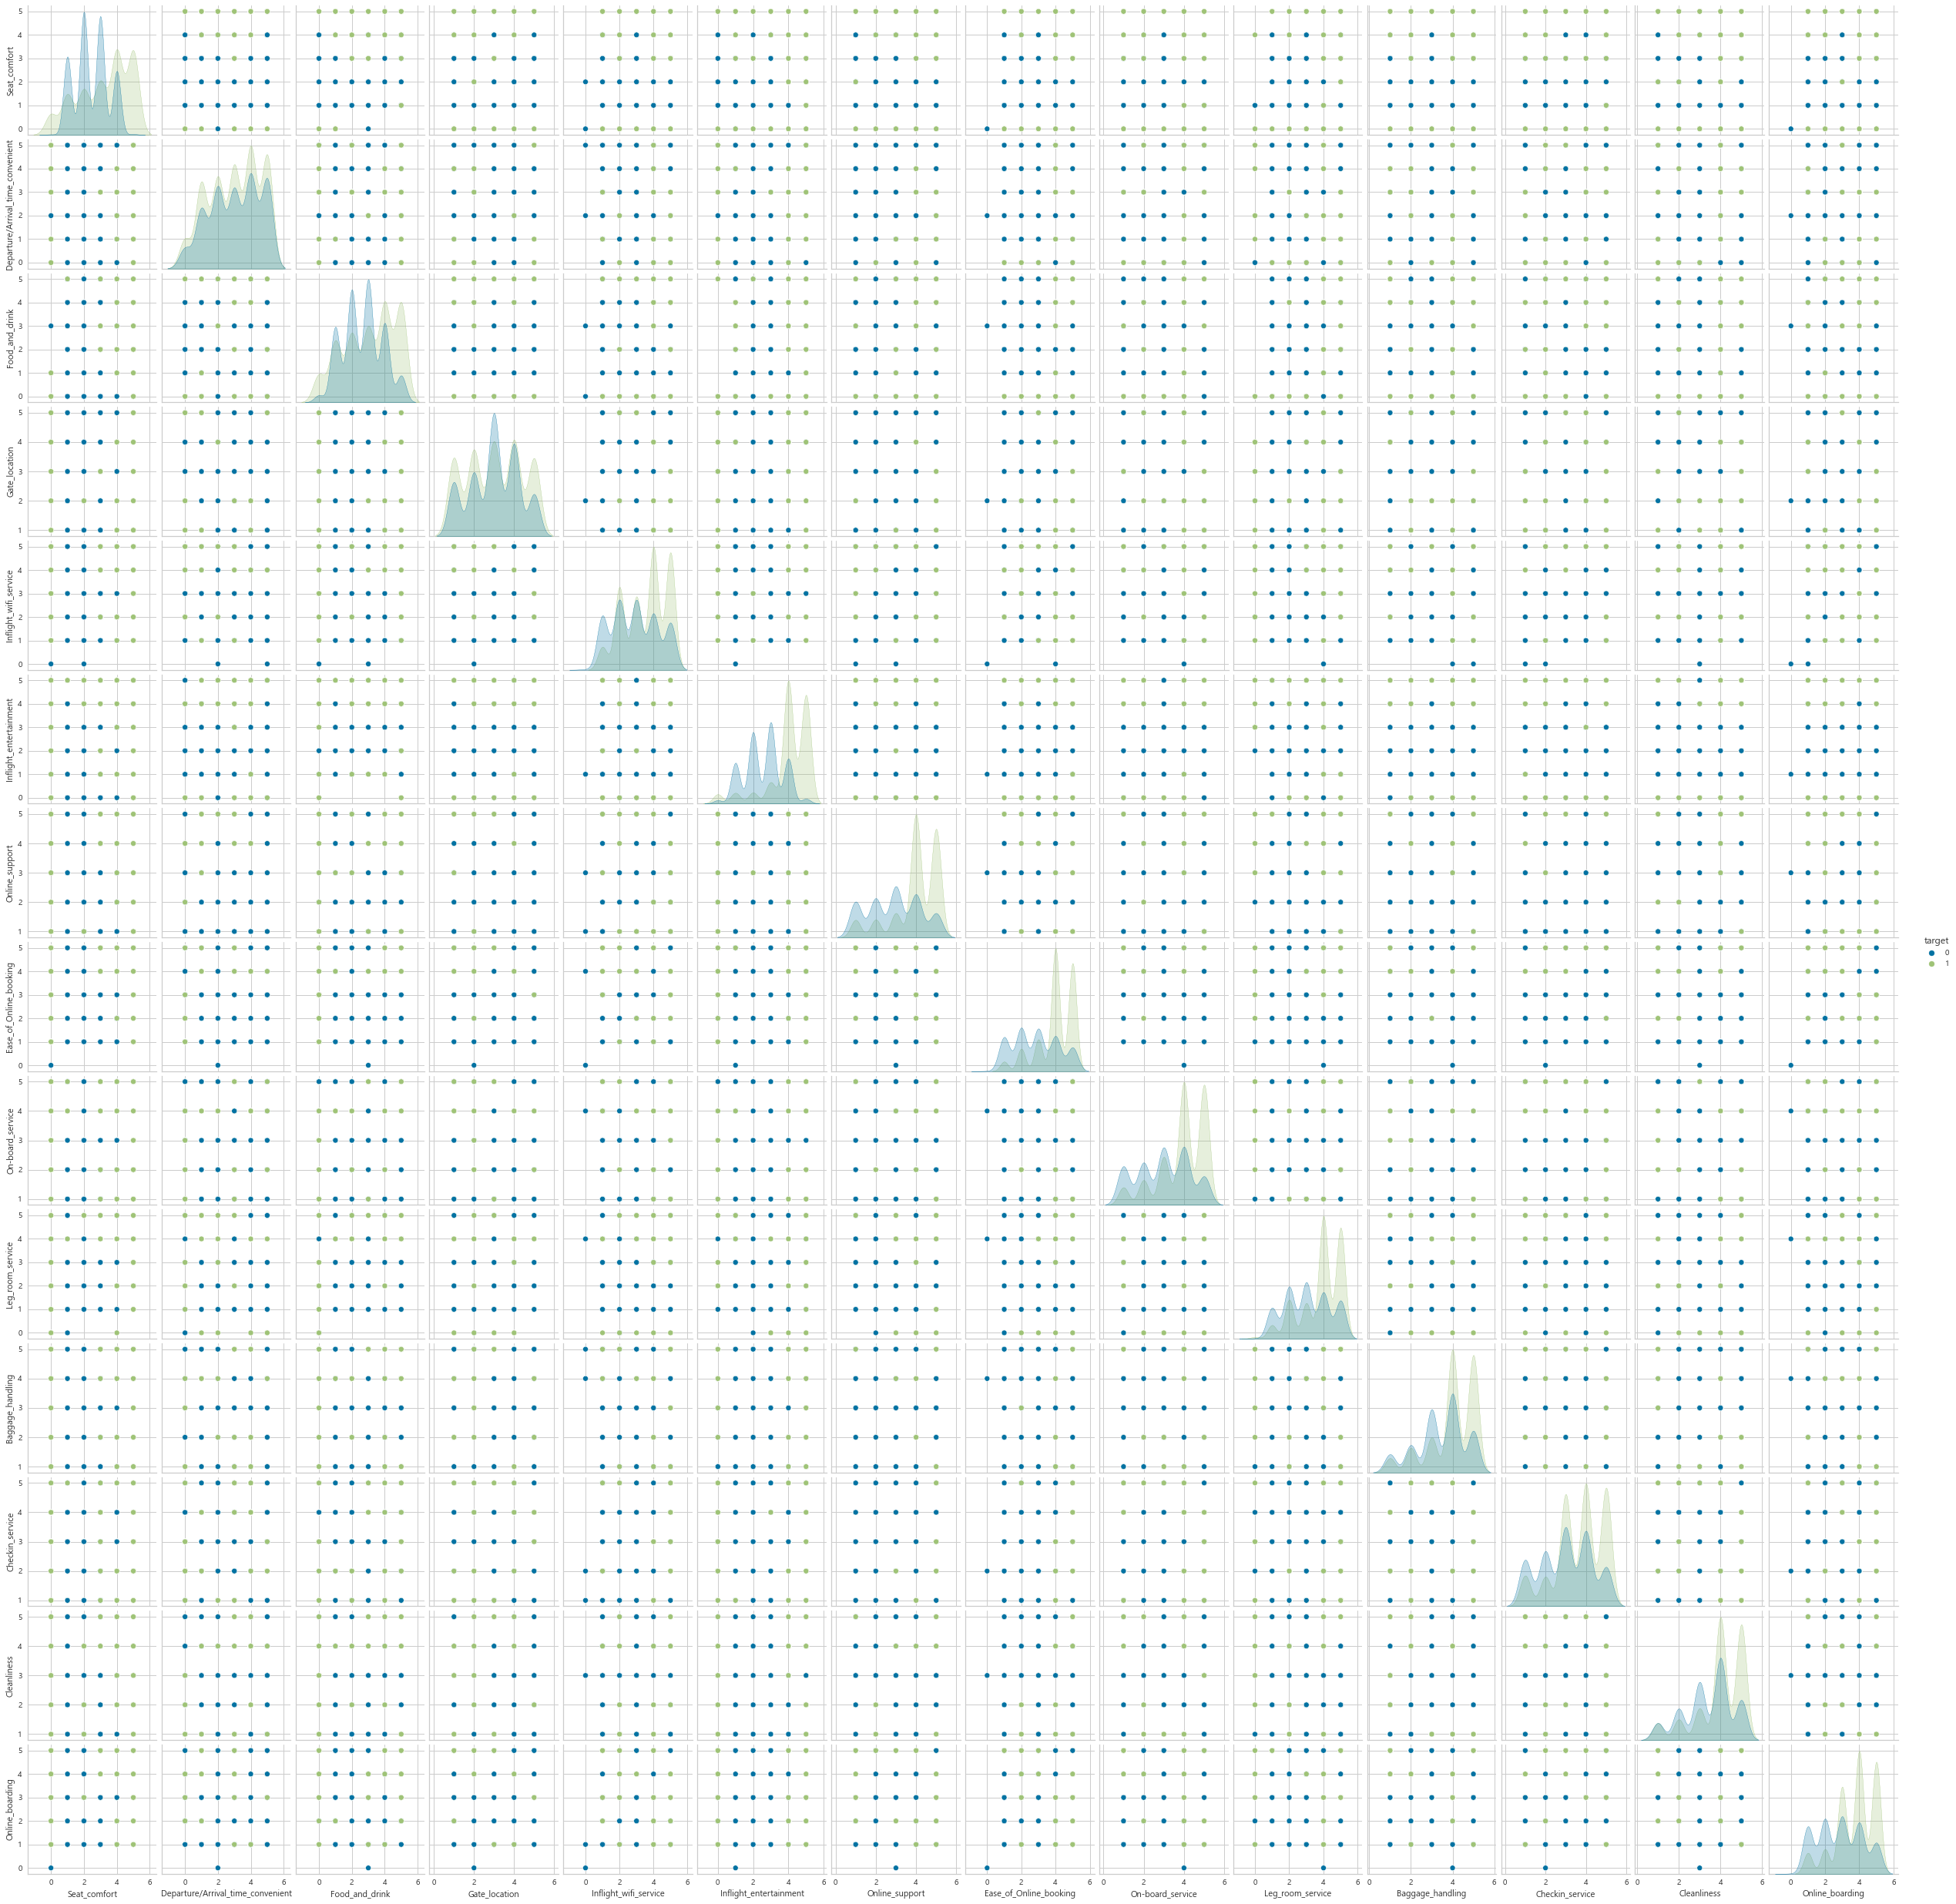

In [81]:
sns.pairplot(train[cat_features+['target']], hue='target')

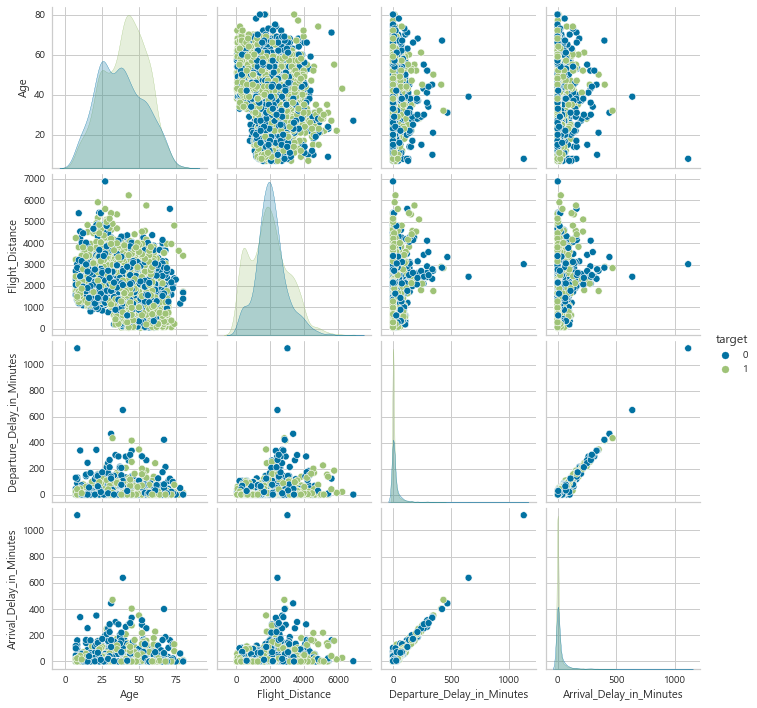

In [82]:
sns.pairplot(train[num_features+['target']], hue='target')

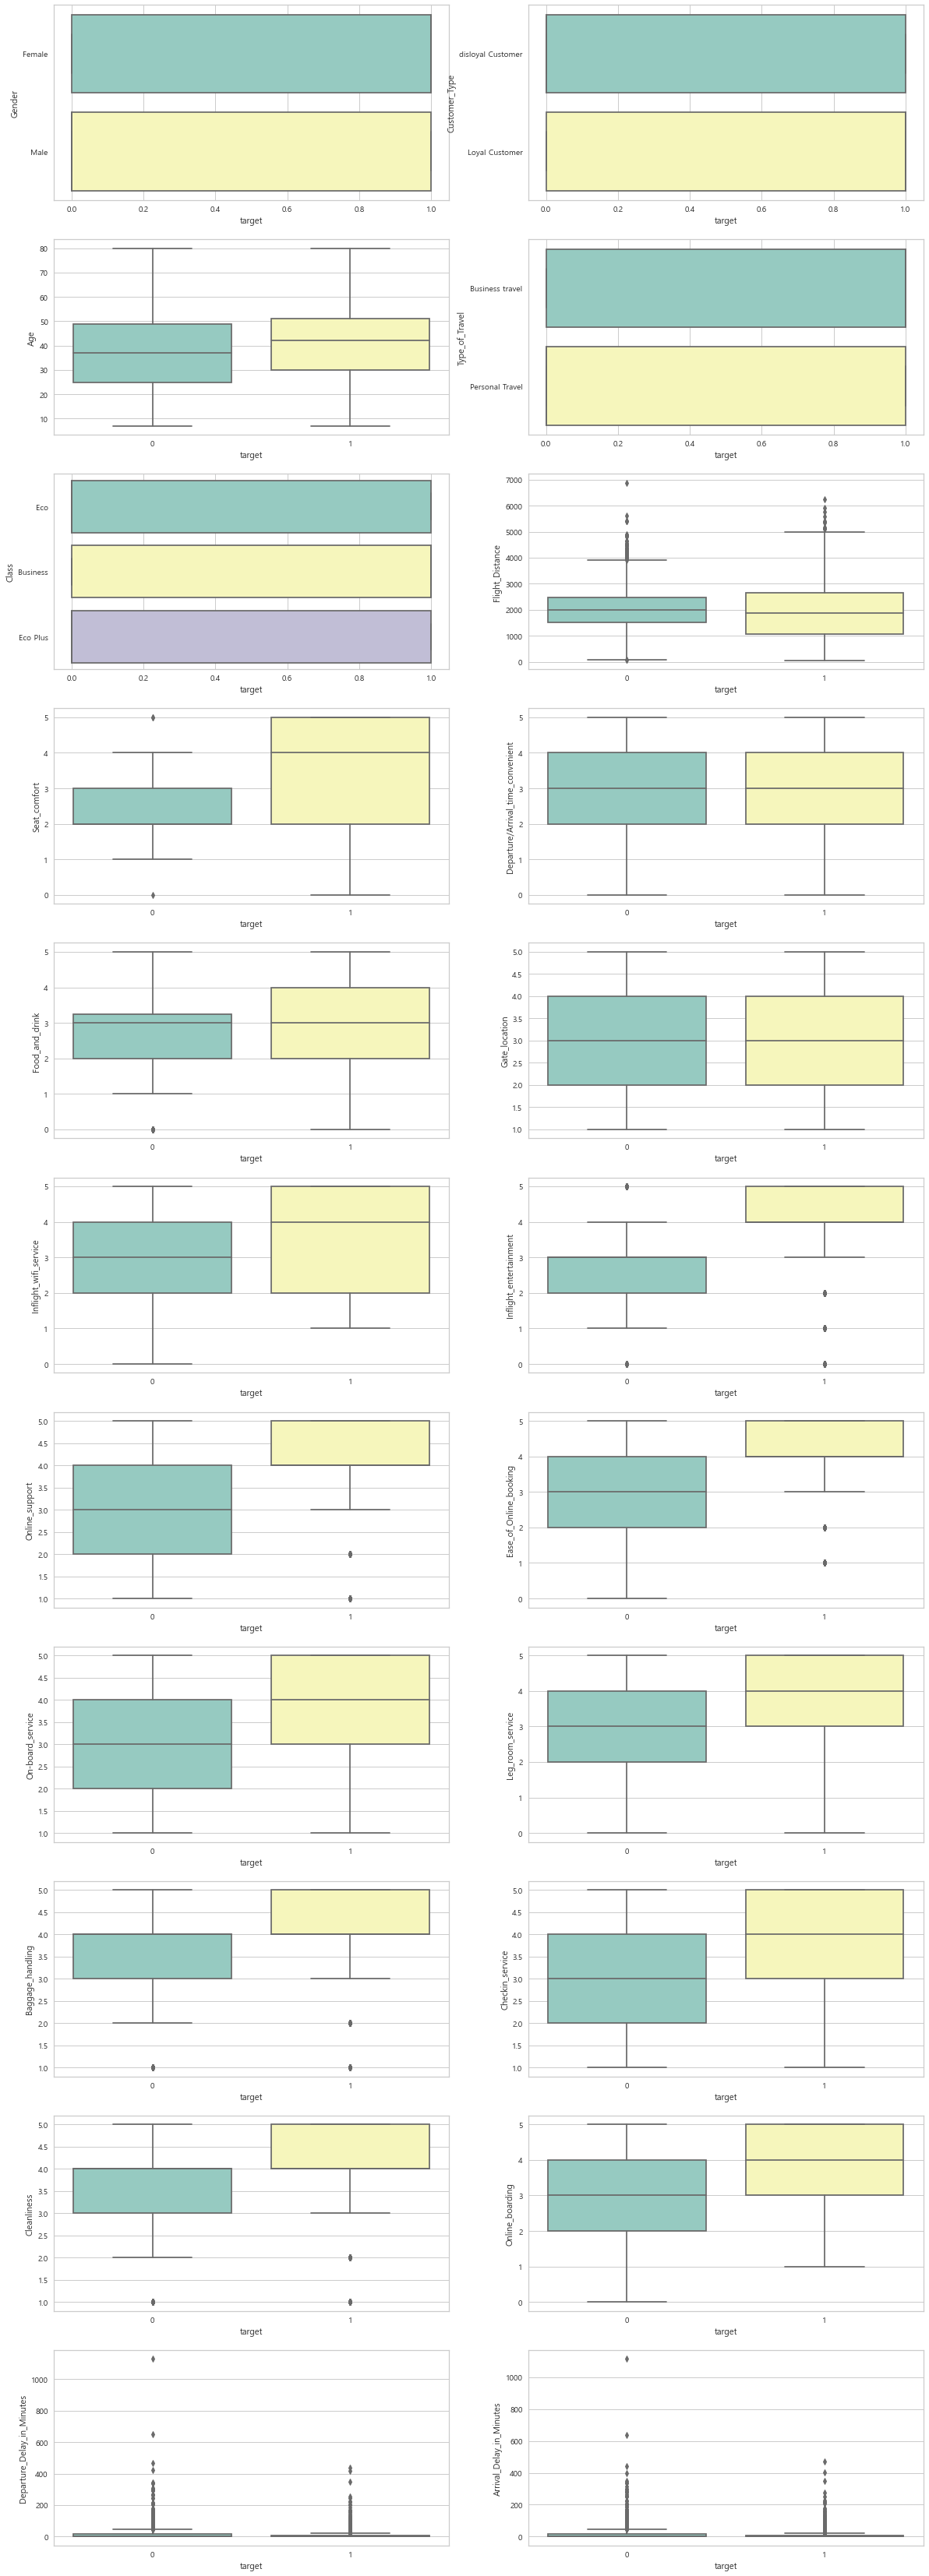

In [89]:
fig, ax = plt.subplots(nrows=11, ncols=2, figsize=(20,60))
for i, col in enumerate(train.columns[:-1]):
    sns.boxplot(data=train, x='target', y=col, palette='Set3', ax=ax[i//2][i%2], dodge=False)
plt.show()

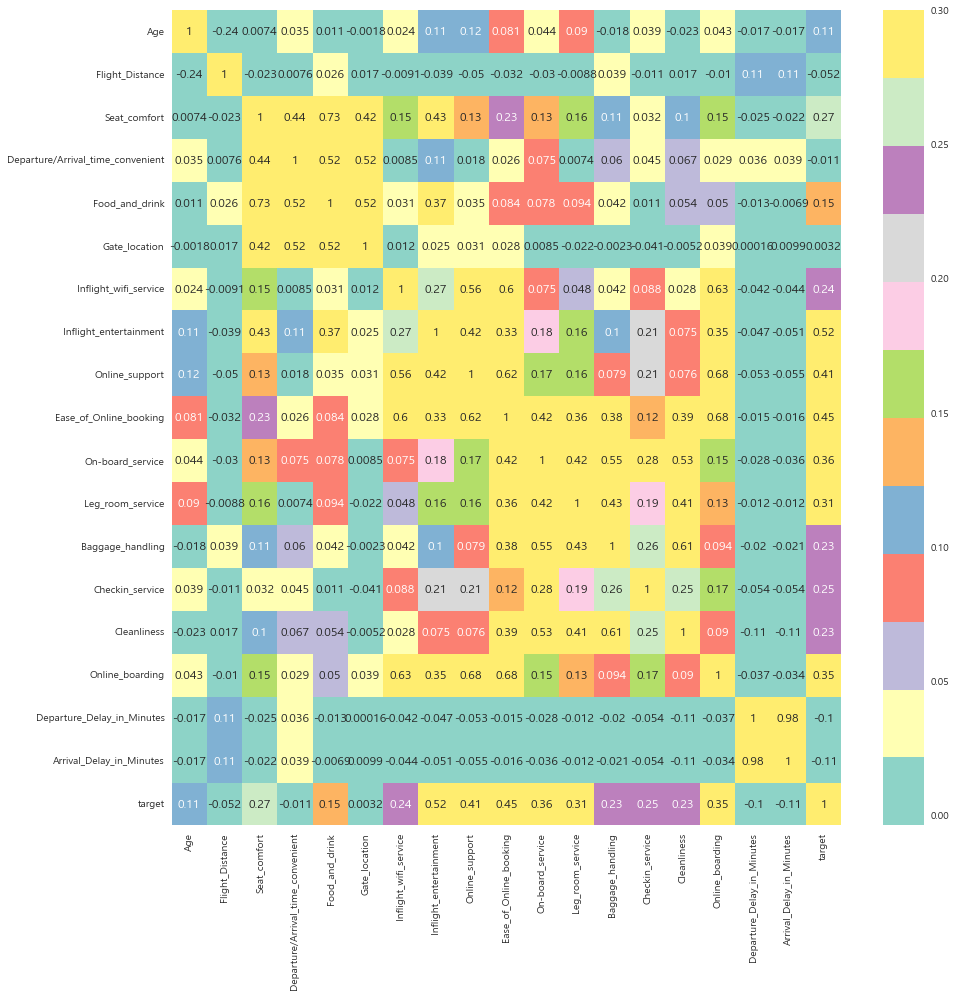

In [92]:
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(train.corr(), cmap='Set3', annot=True, vmin=-0.0040, vmax=0.3)

상관관계가 서로 0.7이상인 feature 중 target과 상관관계가 낮은 feature는 제거

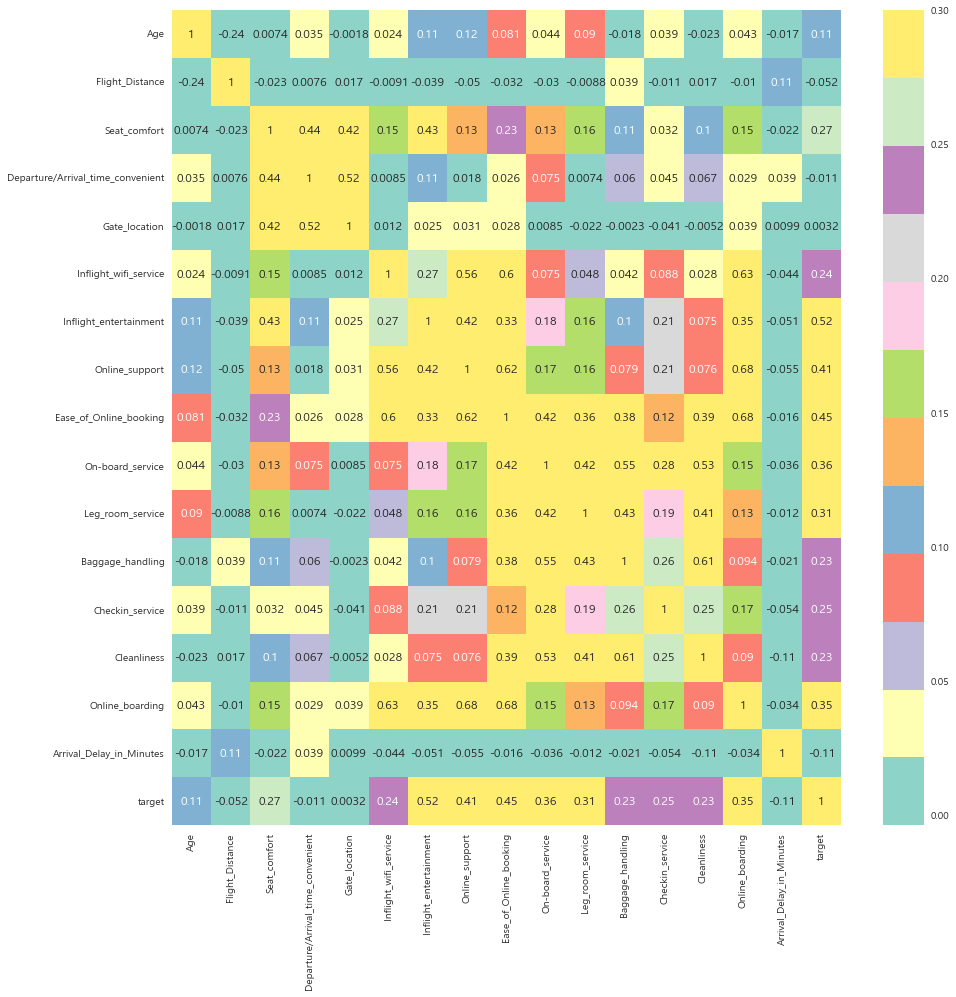

In [107]:
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(train.drop(columns=['Departure_Delay_in_Minutes',
                                     'Food_and_drink']).corr(), cmap='Set3', annot=True, vmin=-0.0040, vmax=0.3)